<a href="https://colab.research.google.com/github/Samuel-jesusboy/Machine_Learning-Competitions/blob/main/Car%20Price%20Prediction/Car_Price_Prediction_Data_Clenaing_and_Feature_Eng_and_Base_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## i) Summary of Data
This is a dataset of 11974 different  used cars (1974-2024) having the same brand, model and model_year. Price of each car depends on 11 features :brand, model, model_year,  milage, fuel_type, engine, transmission, ext_col, int_col, accident and clean_title. The total number of data that we have are about  54273. Each row contain detail information of particular car and the price it had been sold out. The source of this data is https://www.kaggle.com/competitions/kagglex-cohort4/data which was extracted from  https://www.cars.com/ .

## ii) Columns Description
- `id`: The unique identifier of each car ranges from 0 to 54272.
- `brand`: Name of brand or company name of each car.This column consists of 53 different branded cars.
- `model`: Model name of different brand car. There are 1827 different car model.
- `model_year`: Year at which the car was manufactured. The year ranges from 1974 A.D to 2024 A.D.
- `milage`: The total number of miles that a vehicle has been driven.Its value ranges from 100 miles to 405000 miles.
- `fuel_type`: Type of fuel the vehicles run on, weather it’s gasoline, diesel, electric or hybrid.
- `engine`: Specification of engine that contains power of engine (in horsepower), total volume of all the cylinders in the engine (in Liters), number of cylinders in engine, and fuel used by the engine.In dataset ther are 1061 different engine type.
- `transmission`: It refere to the way of transmitting power from the engine to the wheels, allowing the vehicle to move. The transmission is responsible for changing the gears, either manually or automatically, to ensure the engine operates within its most efficient range under varying driving conditions.
- `ext_col`: External colour of cars
- `int_col`: Internal colour of car
- `accident`: This columns determines whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- `clean_title`: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- `price`: Price at which the car sold according to its features above.



## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import re

import warnings
warnings.filterwarnings("ignore")

## 2. Display Setting

In [ ]:
pd.set_option('display.max_columns',None)

## 3. Getting Data and Concatnating

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Both the training and testing data need to be cleaned
df=pd.concat([train,test])

## 4. Data Preprocessing

Feature engineering using `engine` column:
- It consists of 3 specific features of car that are hp (power of car's engine), volume (total volume of cyclinders of engine in liters) and cylinders (number of cylinders in engine).
- Logically these features plays a vital role in determining the price of any car.
- So I am creating 3 new columns named `hp`, `volume`, `cylinders`.

In [ ]:
import re

# Function to extract HP
def extract_hp(engine_str):
    match = re.search(r'(\d+\.\d+)HP', engine_str)
    return float(match.group(1)) if match else np.nan

# Function to extract Volume
def extract_volume(engine_str):
    match = re.search(r'(\d+\.\d+)L|\b(\d+) L\b|\b(\d+) Liter\b', engine_str)
    return float(match.group(1)) if match and match.group(1) else (float(match.group(2)) if match and match.group(2) else (float(match.group(3)) if match and match.group(3) else np.nan))

# Function to extract number of Cylinders
def extract_cylinders(engine_str):
    match = re.search(r'\b(I|V|W|H)?(\d+) Cylinder\b', engine_str)
    return int(match.group(2)) if match else np.nan

# Create new columns
df['hp'] = df['engine'].apply(extract_hp)
df['volume'] = df['engine'].apply(extract_volume)
df['cylinders'] = df['engine'].apply(extract_cylinders)

### 4.1 Filling `hp` column
- Filling null value in extracted features `hp`, `volume`, `cylinders`:
- Those 3 extracted features which are extracted using engine column contains null value.
- It is because the data present is `engine` column are not continuous and all the data in that column does not contain information about power, volume and number of cyinders.
- The null values are being filled using the features `brand`, `model`, `model_year`.
- These 3 features are being used because car with same `brand`, `model` and `model_year` will have same engine, not necessarily but most likely to have.

In [ ]:
# Group by 'brand', 'model', and 'model_year' and fill the null values
df['hp'] = df.groupby(['brand', 'model', 'model_year'])['hp'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'engine' and fill the null values
df['hp'] = df.groupby(['engine'])['hp'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check for null values in 'hp' column
null_hp_mask = df['hp'].isnull()


# Create a dictionary mapping engine types to horsepower values
engine_hp_mapping = {
    "1.4L I4 16V GDI DOHC Turbo": 138,
    "4.2L V8 32V GDI DOHC Twin Turbo": 550,
    "3.0L V6 24V PDI DOHC Twin Turbo": 330,
    "6.8L V12 48V GDI DOHC": 563,
    "3.5L 24V SOHC I-VTEC V6": 285,
    "3.2L V6 18V MPFI SOHC": 215,
    "1.3L I3 12V MPFI DOHC Turbo": 155
}

# Fill 'hp' column based on 'engine' column using the mapping for rows with null 'hp'
df.loc[null_hp_mask, 'hp'] = df.loc[null_hp_mask, 'engine'].map(engine_hp_mapping)

# Check if there are still any remaining null values in 'hp' column and fill them with NaN
df['hp'] = df['hp'].fillna(pd.NA)


# Group by 'brand','model' and fill the null values
df['hp'] = df.groupby(['brand','model'])['hp'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand' and fill the null values
df['hp'] = df.groupby(['brand'])['hp'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

### 4.2 Filling `cylinders` column
- Some of the cylinders data does not filled using brand, model and model_year so filling them manually by taking data from internet.

In [ ]:
# Group by 'brand', 'model', and 'model_year' and fill the null values
df['cylinders'] = df.groupby(['brand', 'model', 'model_year'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model' and fill the null values
df['cylinders'] = df.groupby(['brand', 'model'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model_year' and fill the null values
df['cylinders'] = df.groupby(['brand', 'model_year'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'model', 'model_year' and fill the null values
df['cylinders'] = df.groupby(['model', 'model_year'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'model' and fill the null values
df['cylinders'] = df.groupby(['model'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand' and fill the null values
df['cylinders'] = df.groupby(['brand'])['cylinders'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df['cylinders'] = df['cylinders'].fillna(8)

### 4.3 Filling `volume` column
- Some of the volume data does not fill with the use of brand, model and model_year, so filling them manually by lookin through internet.

In [ ]:
# Function to set volume to 0 if cylinders is 0
def set_volume_to_zero(row):
    if row['cylinders'] == 0:
        return 0
    else:
        return row['volume']

# Apply the function to the 'volume' column
df['volume'] = df.apply(set_volume_to_zero, axis=1)


# Group by 'brand', 'model', and 'model_year' and fill the null values
df['volume'] = df.groupby(['brand', 'model', 'model_year'])['volume'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model' and fill the null values
df['volume'] = df.groupby(['brand', 'model'])['volume'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'model', and 'model_year' and fill the null values
df['volume'] = df.groupby(['model', 'model_year'])['volume'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand' and 'model_year' and fill the null values
df['volume'] = df.groupby(['brand', 'model_year'])['volume'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'model' and fill the null values
df['volume'] = df.groupby(['model'])['volume'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df['volume'] = df['volume'].fillna(0)

### 4.4 Filling `fuel_type` column
- It consists of '–' which need to be replace with NaN for further filling process.
- It also consists of 'not supported' which should be replaced with null value.
- The null values were fill according to the common brand, model and mode_year.
- Since cars with same brand, model and model_year have most likely to have same engine type. Not necessary but most likely to have.

In [ ]:
df=df.replace('–',np.nan)

In [ ]:
df['fuel_type'] = df['fuel_type'].replace('not supported',np.nan)

In [ ]:
# Group by 'engine' and fill the null values
df['fuel_type'] = df.groupby(['engine'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['brand', 'model', 'model_year'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


# Function to set fuel_type to Plug-In Hybrid if engine contains 'Electric' or 'Battery' and fuel_type is null
def set_fuel_type_pluginhybrid(row):
    if pd.isnull(row['fuel_type']) and isinstance(row['engine'], str) and ('Electric' in row['engine'] or 'Battery' in row['engine']):
        return 'Plug-In Hybrid'
    else:
        return row['fuel_type']

# Apply the function to the 'fuel_type' column
df['fuel_type'] = df.apply(set_fuel_type_pluginhybrid, axis=1)


# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['brand', 'model'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['model', 'model_year'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['brand', 'model_year'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['model'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['fuel_type'] = df.groupby(['brand'])['fuel_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

### 4.5 Improving consistency of `transmission` column, creating new column `transmission_type` and filling it
- Data are not consistent in this column such as A/T,Automatic,M/T,Manual and others.
- Those values need to make consistent.
- This column have no null value.
- Using this column nwe column was created named transmission_type where there will be four major types. They are: Automatic, Manual, DCT (Dual Transmission) and CVT (Variable Transmission).

In [ ]:
# Group by 'brand', 'model', and 'model_year' and fill the null values
df['transmission'] = df.groupby(['brand', 'model', 'model_year'])['transmission'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['transmission'] = df.groupby(['brand', 'model'])['transmission'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['transmission'] = df.groupby(['brand'])['transmission'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# prompt: in transmission column if there is A/T in sentence of data, change it into Automatic and if there is M/T or Mt in sentence of data, change it into Manual
df['transmission'] = df['transmission'].apply(lambda x: 'Automatic' if 'A/T' in x else ('Manual' if 'M/T' in x or 'Mt' in x else x))

# prompt: in transmission column if there is 'SCHEDULED FOR OR IN PRODUCTION' or '2'make it null value
df['transmission'] = df['transmission'].apply(lambda x: 'NaN' if 'SCHEDULED FOR OR IN PRODUCTION' in x or '2' in x else x)

# prompt: in transmission column if there is 'Transmission w/Dual Shift Mode' change it to DCT
df['transmission'] = df['transmission'].apply(lambda x: 'DCT' if 'Transmission w/Dual Shift Mode' in x else x)

# prompt: in transmission column if there is 'CVT Transmission' or  'Automatic CVT' or 'F' or 'CVT-F' or 'Variable' change it to CVT
df['transmission'] = df['transmission'].replace(['CVT Transmission', 'Automatic CVT', 'F', 'CVT-F', 'Variable'], 'CVT')

# prompt: in transmission column if there is 'Transmission Overdrive Switch' change it to Automatic
df['transmission'] = df['transmission'].apply(lambda x: 'Automatic' if 'Transmission Overdrive Switch' in x else x)


def transmission_type(transmission):
  if 'Automatic' in transmission:
    return 'Automatic'
  elif 'Manual' in transmission or 'Mt' in transmission:
    return 'Manual'
  elif 'DCT' in transmission:
    return 'DCT'
  elif 'CVT' in transmission:
    return 'CVT'
  else:
    return np.nan

df['transmission_type'] = df['transmission'].apply(transmission_type)


# Group by 'brand', 'model', and 'model_year' and fill the null values
df['transmission_type'] = df.groupby(['brand', 'model', 'model_year'])['transmission_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model', and 'model_year' and fill the null values
df['transmission_type'] = df.groupby(['brand', 'model'])['transmission_type'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

### 4.6 Extraction of `gears` column and filling null values
- This column gives the information about the number of gears used for power transmission.
- It ranges from 2 to 10.
- Data for gear column have been extracted from transmission column.
- And the null values were fill according to brand, model and model_year as above.

In [ ]:
# prompt: from transmission i want to make a column named gears.if there is number-speed  then write number in gears column.like if there is '7-Speed Automatic with Auto-Shift' write 7 in gears column else put null value
def extract_gears(transmission):
  match = re.search(r'(\d+)-Speed', transmission)
  return int(match.group(1)) if match else np.nan

df['gears'] = df['transmission'].apply(extract_gears)


# Group by 'brand', 'model', and 'model_year' and fill the null values
df['gears'] = df.groupby(['brand', 'model', 'model_year'])['gears'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand', 'model' and fill the null values
df['gears'] = df.groupby(['brand', 'model'])['gears'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand','model_year' and fill the null values
df['gears'] = df.groupby(['brand', 'model_year'])['gears'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'model', and 'model_year' and fill the null values
df['gears'] = df.groupby([ 'model', 'model_year'])['gears'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Group by 'brand' and fill the null values
df['gears'] = df.groupby(['brand'])['gears'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# prompt: if there is Saturn in brand column put 5 in gears column,if there is Lotus  in brand column put 6 in gears column,if there is Suzuki     in brand column put 6 in gears column,if there is Saab   in brand column put 5 in gears column,if there is Plymouth  in brand column put 5 in gears column,
df.loc[df['brand'] == 'Saturn', 'gears'] = 5
df.loc[df['brand'] == 'Lotus', 'gears'] = 6
df.loc[df['brand'] == 'Suzuki', 'gears'] = 6
df.loc[df['brand'] == 'Saab', 'gears'] = 5
df.loc[df['brand'] == 'Plymouth', 'gears'] = 5

## 5. Getting required column and splitting training and testing data

In [ ]:
final_df=df[['hp','volume','cylinders','fuel_type','milage','brand','model','model_year','transmission','gears','accident','transmission_type','price']]

In [ ]:
final_train_df1 = final_df.iloc[:54273]
final_test_df1 = final_df.iloc[54273:]

# Modelling part

In [ ]:
!pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score

from feature_engine.datetime import DatetimeFeatures

from xgboost import XGBRegressor

import joblib

import matplotlib.pyplot as plt

## 2. Display Setting

In [ ]:
pd.set_option('display.max_columns',None)

## 3. Getting Data

In [ ]:
train_df = final_train_df1
test_df = final_test_df1

### 3.1 Splitting Data

In [ ]:
def split_data(data):
  x = data.drop(columns=["price"])
  y = data.price.copy()
  return x,y

In [ ]:
x_train, y_train = split_data(train_df)
x_test, y_test = split_data(test_df)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(54273, 12) (54273,)
(36183, 12) (36183,)


### 3.2 Meta_Info

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hp                 54273 non-null  float64
 1   volume             54273 non-null  float64
 2   cylinders          54273 non-null  float64
 3   fuel_type          54273 non-null  object 
 4   milage             54273 non-null  int64  
 5   brand              54273 non-null  object 
 6   model              54273 non-null  object 
 7   model_year         54273 non-null  int64  
 8   transmission       54273 non-null  object 
 9   gears              54273 non-null  float64
 10  accident           54273 non-null  object 
 11  transmission_type  54273 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 5.4+ MB


## 4. Data Preprocessing

In [ ]:
x_train['model_year'] = pd.to_datetime(x_train['model_year'], format='%Y')

num_cols=['hp','volume','cylinders','milage','gears']

dt_cols=['model_year']

cat_cols=['fuel_type','brand','model','transmission_type','accident']

In [ ]:
num_pipe= Pipeline(steps=[
    ('scaler',StandardScaler())
])

cat_pipe=Pipeline([
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

dt_pipe = Pipeline(steps=[
    ('date_time', DatetimeFeatures(variables=dt_cols, features_to_extract=['year'])),
    ( 'scaler', StandardScaler())
])

In [ ]:
preprocessing_pipeline=ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols),
    ('dt_pipe', dt_pipe, dt_cols)
])

In [ ]:
preprocessing_pipeline.fit_transform(x_train)

array([[ 0.3929793 , -0.16092639, -0.18017411, ...,  0.        ,
         1.        ,  0.52032471],
       [-0.30012881, -0.53295147, -0.18017411, ...,  0.        ,
         1.        , -1.44787727],
       [-0.30012881,  0.35990871,  1.105045  , ...,  0.        ,
         1.        , -1.09002236],
       ...,
       [ 0.80884417, -0.08652138, -0.18017411, ...,  1.        ,
         0.        , -0.37431255],
       [ 1.29864056,  0.21109868, -0.18017411, ...,  0.        ,
         1.        ,  1.41496198],
       [-0.66054502, -1.27700161, -1.46539322, ...,  0.        ,
         1.        ,  1.05710707]])

## 5. Model Selection

In [ ]:
algorithms = {
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'KNN':KNeighborsRegressor(),
    'Decission Tree':DecisionTreeRegressor()
}

In [ ]:
# Getting learning curve
def plot_curves(sizes, mean_scores, std_scores, label, ax):
  ax.plot(
      sizes,
      mean_scores,
      marker='o',
      label=label
  )

  ax.fill_between(
      x= sizes,
      y1= mean_scores-std_scores,
      y2= mean_scores+std_scores,
      alpha=0.3
  )

In [ ]:
# For learning curve
def plot_learning_curves(name, algorithm, figsize=(12,4)):
  model=Pipeline(steps=[
      ("pre", preprocessing_pipeline),
      ("alg", algorithm)
  ])

  train_sizes,train_scores,test_scores=learning_curve(
      estimator=model,
      X=x_train,
      y=y_train,
      cv=3,
      scoring='r2',
      n_jobs=-1,
      random_state=42
      )

  mean_train_scores=np.mean(train_scores,axis=1)
  std_train_scores=np.std(train_scores,axis=1)
  train_score=f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

  mean_test_scores=np.mean(test_scores,axis=1)
  std_test_scores=np.std(test_scores,axis=1)
  test_score=f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

  fig, ax = plt.subplots(figsize=figsize)

  # training curve
  plot_curves(
      sizes=train_sizes,
      mean_scores=mean_train_scores,
      std_scores=std_train_scores,
      label=f"Train ({train_score})",
      ax=ax
  )

  # test curve
  plot_curves(
      sizes=train_sizes,
      mean_scores=mean_test_scores,
      std_scores=std_test_scores,
      label=f"Test ({test_score})",
      ax=ax
  )

  ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

  ax.legend(loc="lower right")

  plt.show()

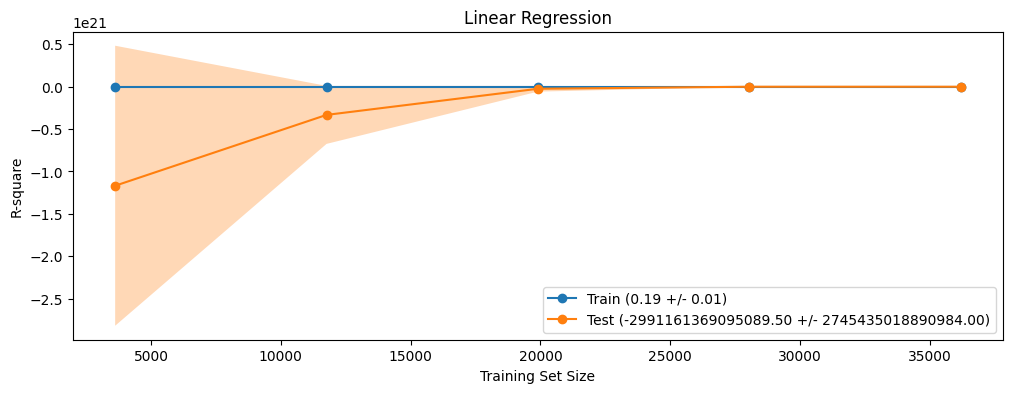

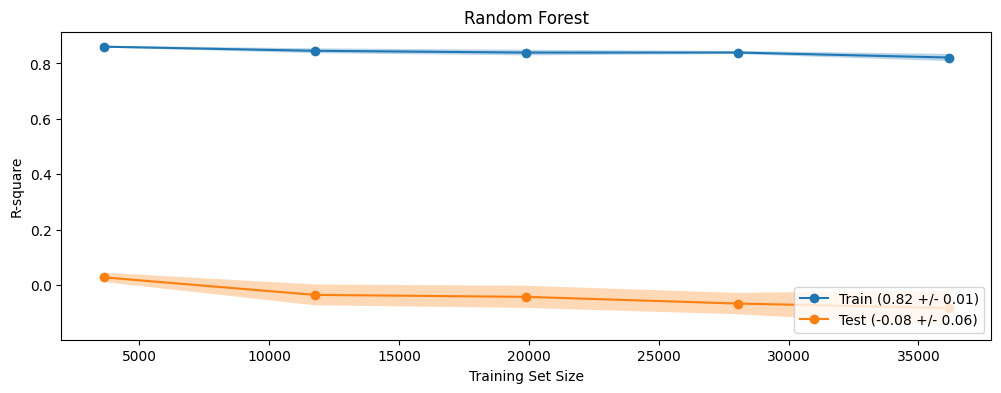

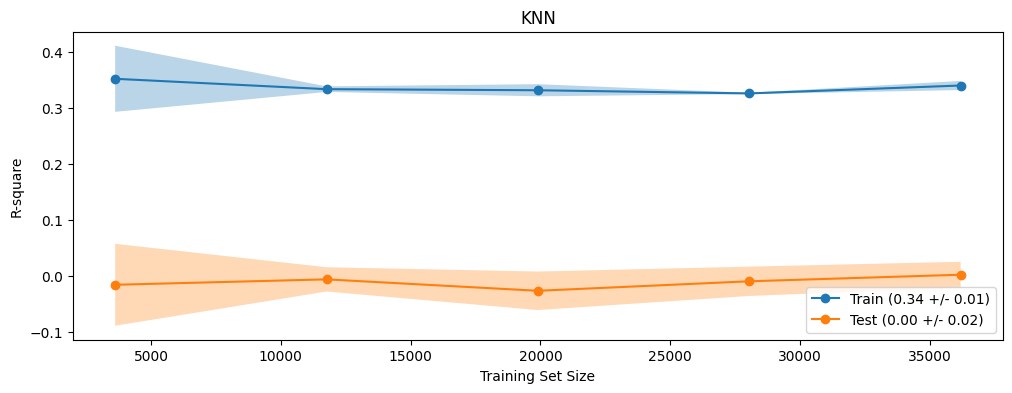

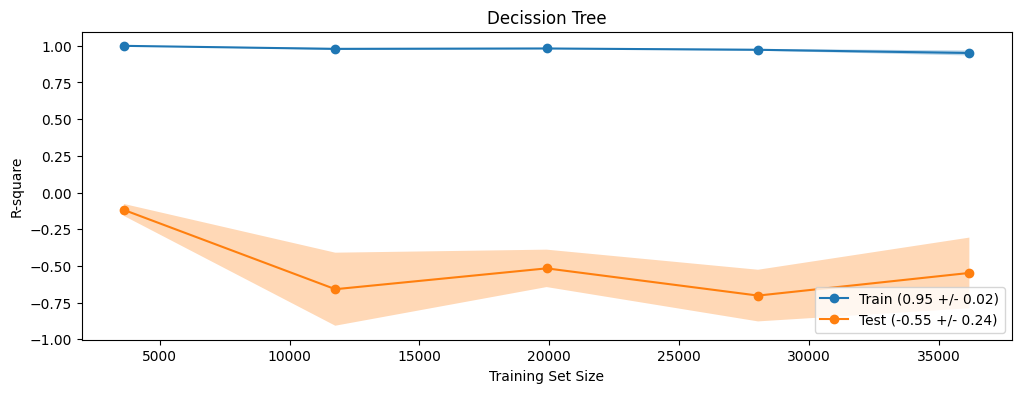

In [ ]:
for name,alg in algorithms.items():
  plot_learning_curves(name, alg)

## 6. Model Training

In [ ]:
model = Pipeline(steps=[
    ("pre", preprocessing_pipeline),
    ("alg", KNeighborsRegressor())
])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['hp', 'volume', 'cylinders',
                                                   'milage', 'gears']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel_type', 'brand',
                                                   'model', 'transmission_type',
                                                   'accident']),
                                                 ('dt_pipe',
                                                  Pipeline(steps=[('date_time',
                                                                   DatetimeFeatures(features_to_extract=['year'],
                                                                                    variables=['model_year'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year'])])),
                ('alg', KNeighborsRegressor())])

## 7. Model Evaluation

In [ ]:
def evaluate_model(x, y):
    y_pred=model.predict(x)
    return r2_score(y, y_pred)

In [ ]:
print(f"R2 Score on Training data is = {evaluate_model(x_train, y_train)}")

R2 Score on Training data is = 0.35284376233541803


In [ ]:
model2 = Pipeline(steps=[
    ("pre", preprocessing_pipeline),
    ("alg", DecisionTreeRegressor())
])

In [ ]:
model2.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['hp', 'volume', 'cylinders',
                                                   'milage', 'gears']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel_type', 'brand',
                                                   'model', 'transmission_type',
                                                   'accident']),
                                                 ('dt_pipe',
                                                  Pipeline(steps=[('date_time',
                                                                   DatetimeFeatures(features_to_extract=['year'],
                                                                                    variables=['model_year'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year'])])),
                ('alg', DecisionTreeRegressor())])

In [ ]:
def evaluate_model(x, y):
    y_pred=model2.predict(x)
    return r2_score(y, y_pred)

In [ ]:
print(f"R2 Score on Training data is = {evaluate_model(x_train, y_train)}")

R2 Score on Training data is = 0.9382045180717404


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3 = Pipeline(steps=[
    ("pre", preprocessing_pipeline),
    ("alg", XGBRegressor(objective = 'reg:squarederror', eval_metric='rmsle', max_depth= 10, n_estimators= 1000, learning_rate= 0.05))
])

In [ ]:
model3.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['hp', 'volume', 'cylinders',
                                                   'milage', 'gears']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel_type', 'brand',
                                                   'model', 'transmission_type',
                                                   'accident']),
                                                 ('dt_pipe',
                                                  Pipeline(steps=[(...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
def evaluate_model(x, y):
    y_pred=model3.predict(x)
    return r2_score(y, y_pred)

In [ ]:
print(f"R2 Score on Training data is = {evaluate_model(x_train, y_train)}")

R2 Score on Training data is = 0.8029972308983706
